In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import csv file
df = pd.read_csv('/content/Supplement Sales Analysis.csv')

In [ ]:
df.head(3) # Sample of dataset for 3 columns

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Discount(%)
0,06-01-2020,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,3
1,06-01-2020,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,4
2,06-01-2020,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon,25


In [ ]:
df.shape  # tells about Number of Rows and Columns

(4384, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
 10  Discount(%)     4384 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 376.9+ KB


In [ ]:
pd.isnull(df).sum()  #Checks for NULL Values

,0
Date,0
Product Name,0
Category,0
Units Sold,0
Price,0
Revenue,0
Discount,0
Units Returned,0
Location,0
Platform,0


In [ ]:
df.columns #Tells about Columns present

Index(['Date', 'Product Name', 'Category', 'Units Sold', 'Price', 'Revenue',
       'Discount', 'Units Returned', 'Location', 'Platform', 'Discount(%)'],
      dtype='object')

In [ ]:
df.describe() #Tells Important Information about each column (COUNT,MEAN,STD,MIN,25%,50%,75%,MAX VALUE)

,Units Sold,Price,Revenue,Discount,Units Returned,Discount(%)
count,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,150.200274,34.781229,5226.569446,0.124398,1.531478,12.439781
std,12.396099,14.198309,2192.491946,0.071792,1.258479,7.179173
min,103.000000,10.000000,1284.000000,0.000000,0.000000,0.000000
25%,142.000000,22.597500,3349.372500,0.060000,1.000000,6.000000
50%,150.000000,34.720000,5173.140000,0.120000,1.000000,12.000000
75%,158.000000,46.712500,7009.960000,0.190000,2.000000,19.000000
max,194.000000,59.970000,10761.850000,0.250000,8.000000,25.000000


**Exploratory Data Analysis**

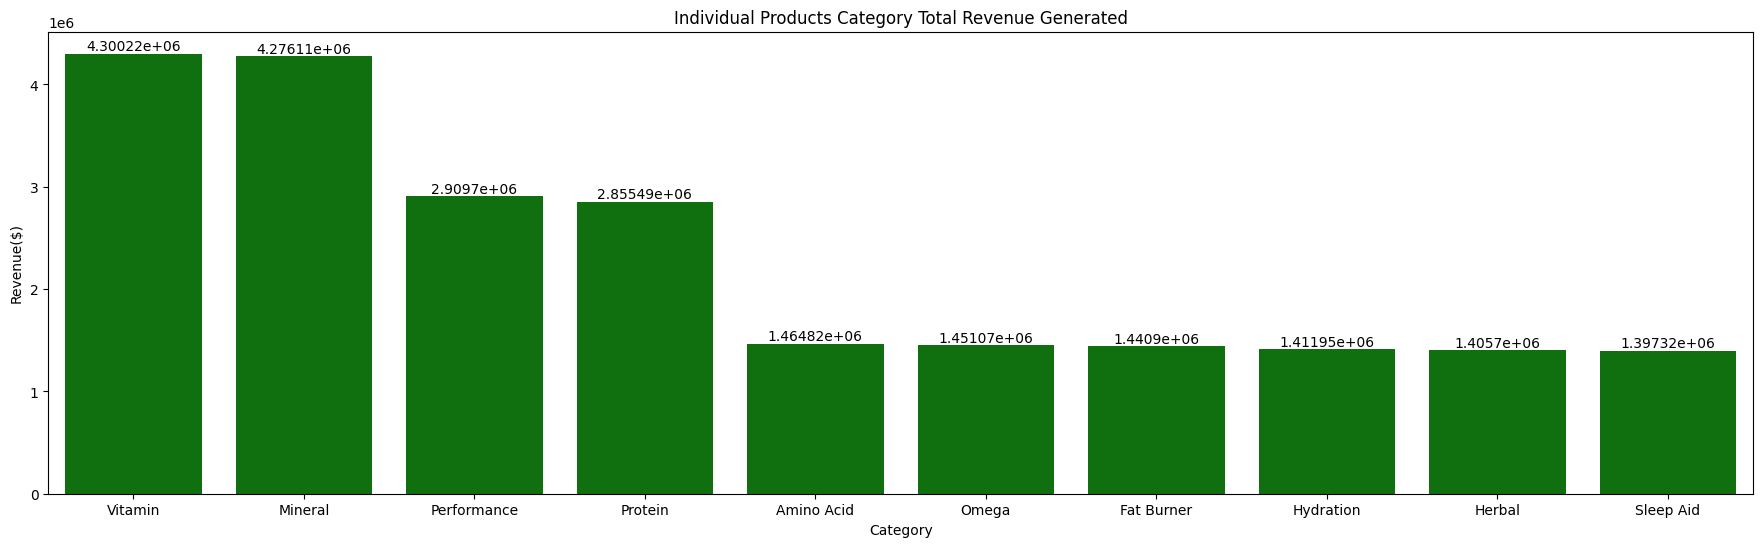

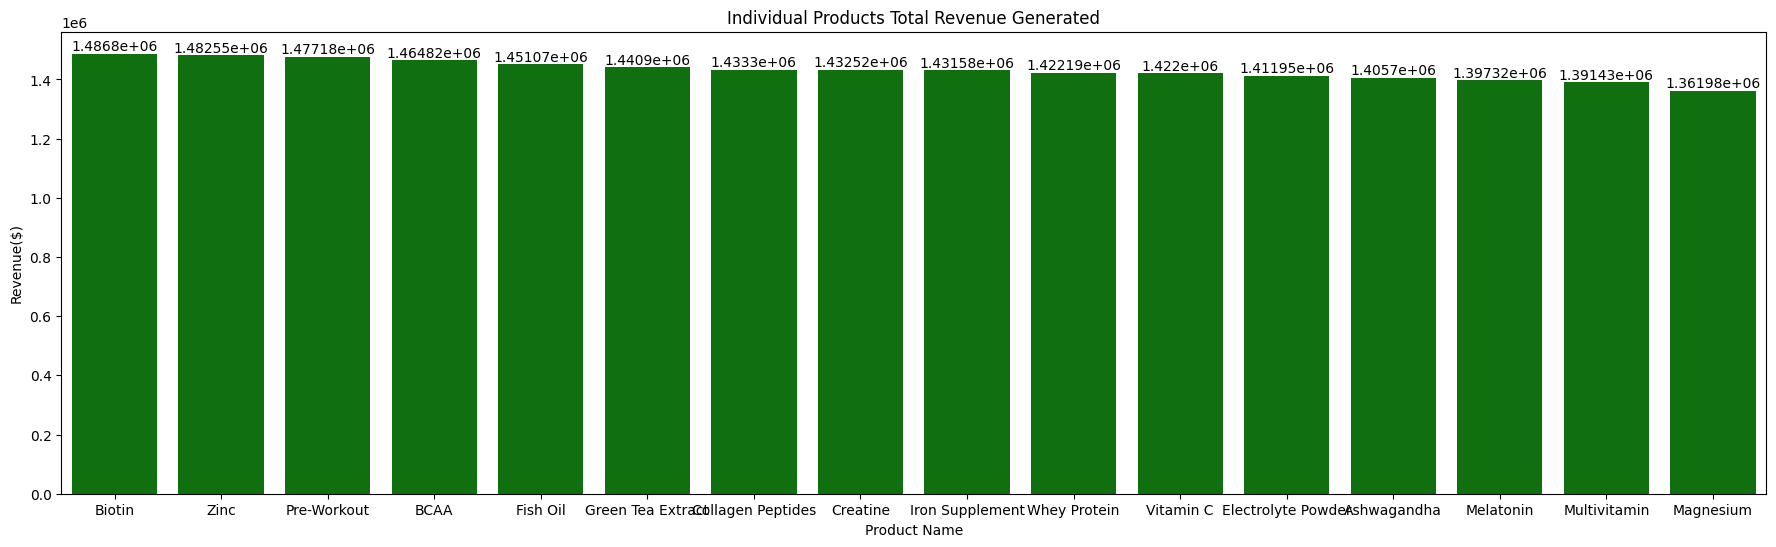

In [ ]:
top_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,6))
plt.title("Individual Products Category Total Revenue Generated")
plt.ylabel("Revenue($)")
ax1=sns.barplot(x=top_revenue.index, y=top_revenue.values)
for a in ax1.containers:
    ax1.bar_label(a)

top_revenue2 = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,6))
plt.title("Individual Products Total Revenue Generated")
plt.ylabel("Revenue($)")
ax1=sns.barplot(x=top_revenue2.index, y=top_revenue2.values)
for b in ax1.containers:
    ax1.bar_label(b)

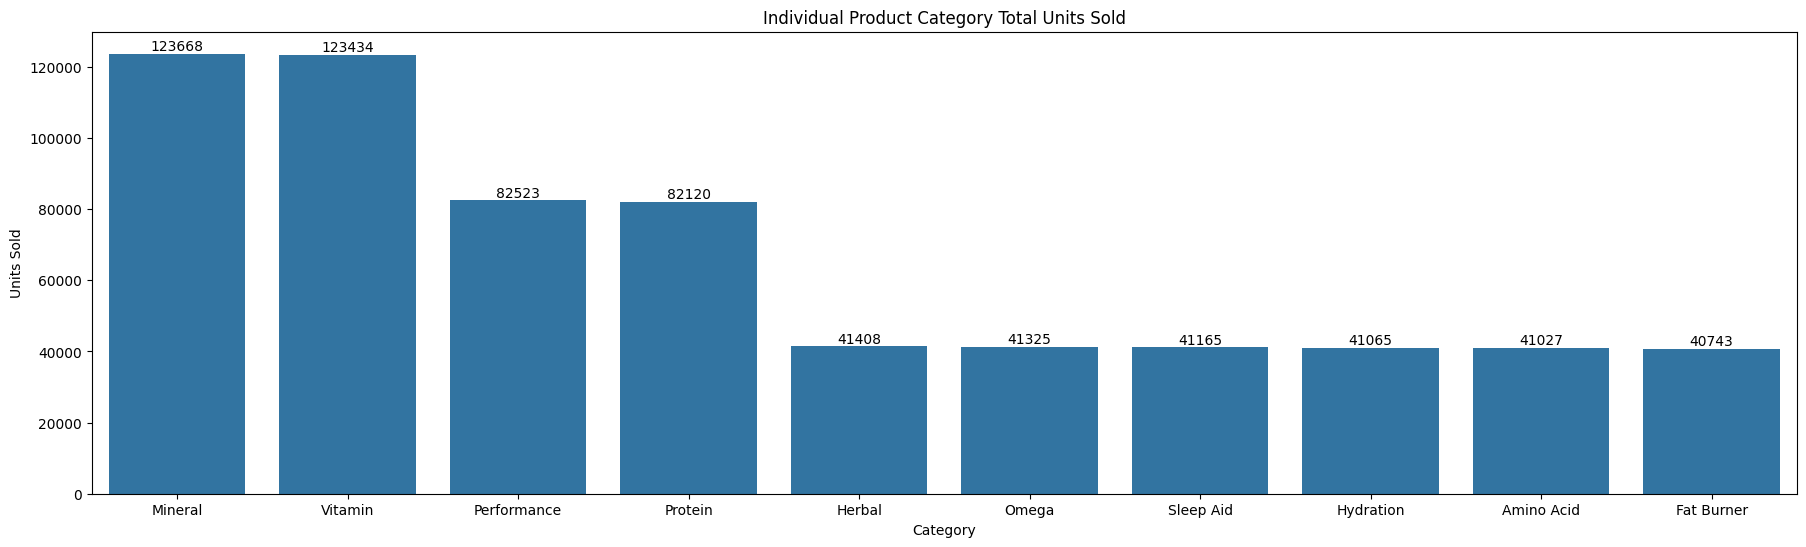

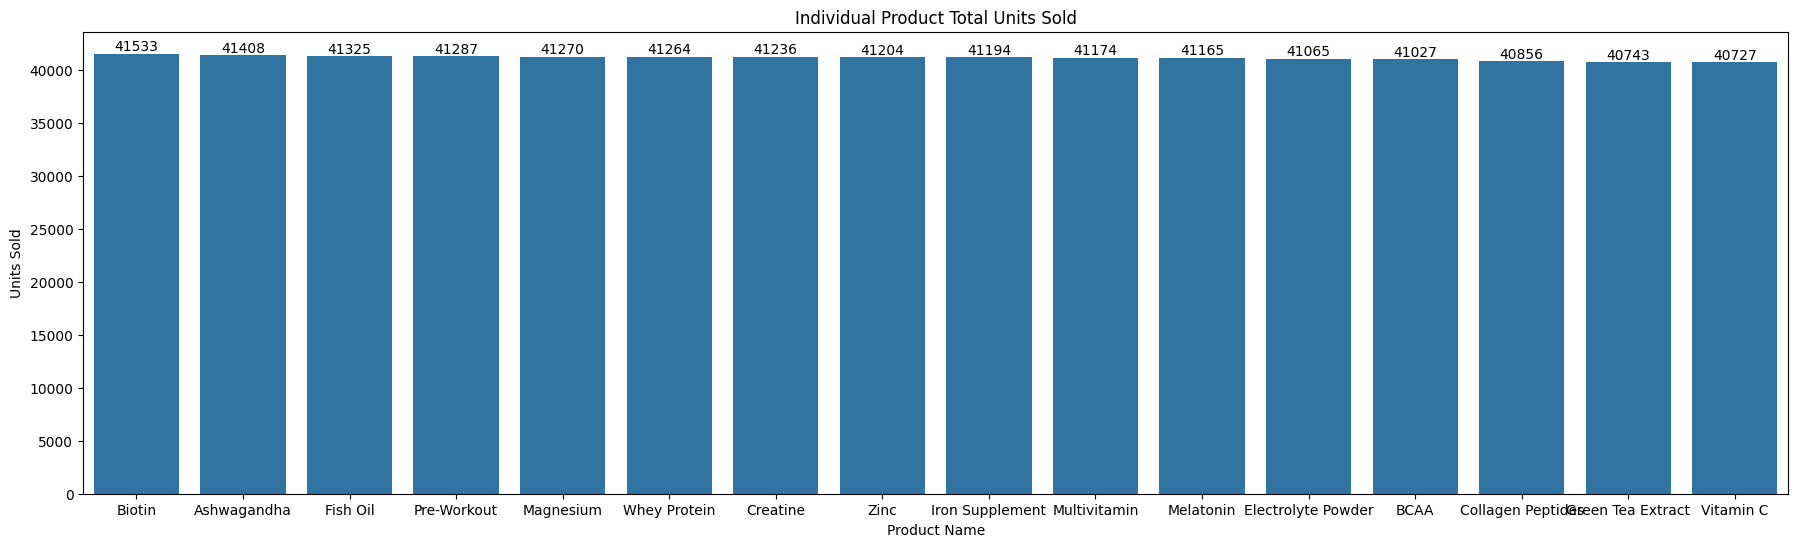

In [ ]:
# Top products by Units Sold
top_units = df.groupby('Category')['Units Sold'].sum().sort_values(ascending=False)
#print(top_units)
plt.figure(figsize=(22,6))
plt.title("Individual Product Category Total Units Sold")
plt.ylabel("Units Sold")
ax1=sns.barplot(x=top_units.index, y=top_units.values)
for barsss in ax1.containers:
    ax1.bar_label(barsss)

top_units2 = df.groupby('Product Name')['Units Sold'].sum().sort_values(ascending=False)
#print(top_units)
plt.figure(figsize=(22,6))
plt.title("Individual Product Total Units Sold")
plt.ylabel("Units Sold")
ax4=sns.barplot(x=top_units2.index, y=top_units2.values)
for barsss1 in ax4.containers:
    ax4.bar_label(barsss1)

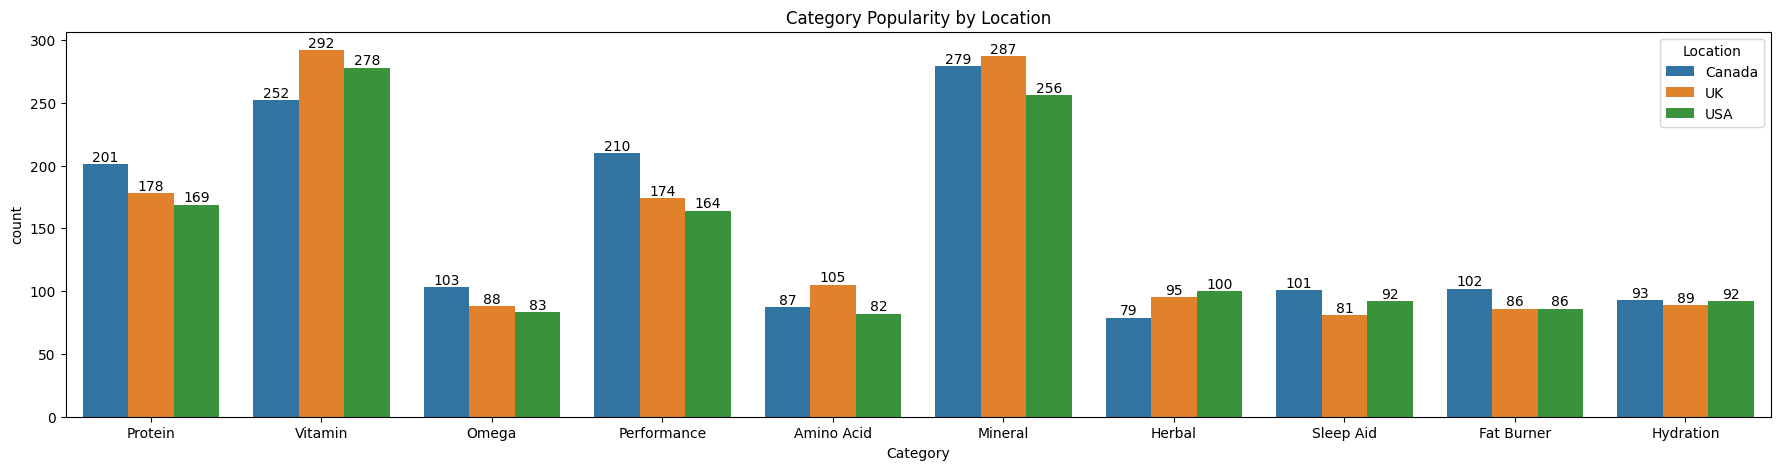

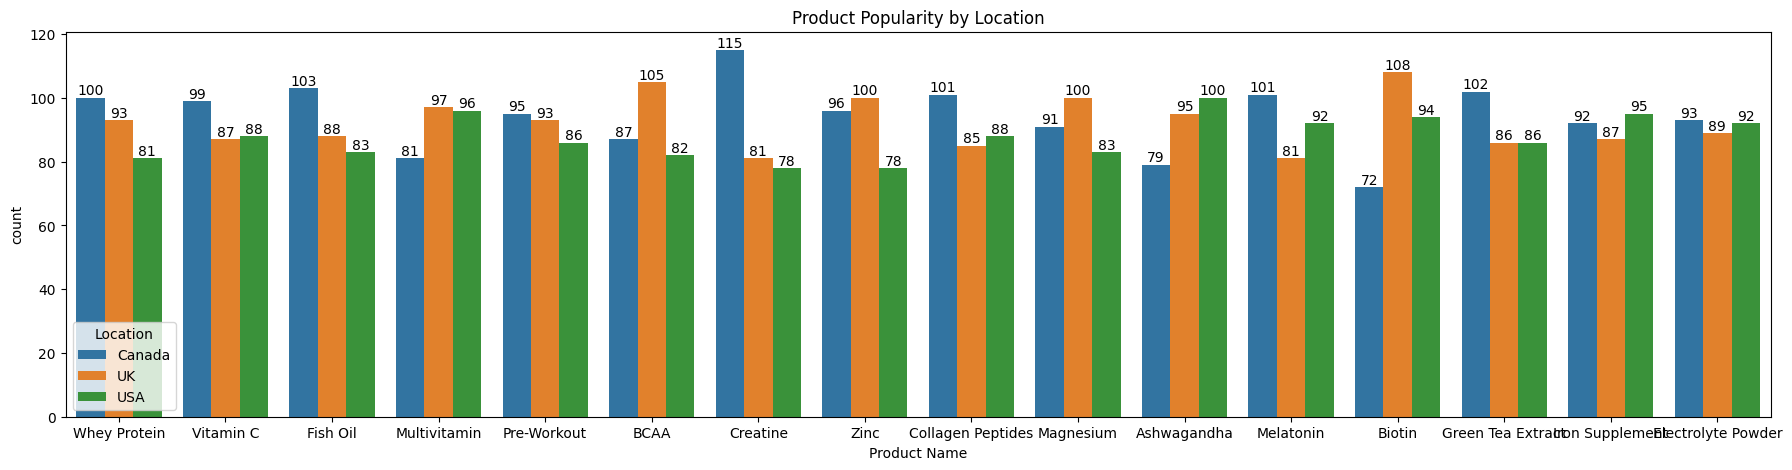

In [ ]:
plt.figure(figsize=(22,5))
p1=sns.countplot(x='Category', hue='Location', data=df)
for bars in p1.containers:
    p1.bar_label(bars)
plt.title("Category Popularity by Location")

plt.figure(figsize=(22,5))
p=sns.countplot(x='Product Name', hue='Location', data=df)
for bars in p.containers:
    p.bar_label(bars)
plt.title("Product Popularity by Location")
plt.show()


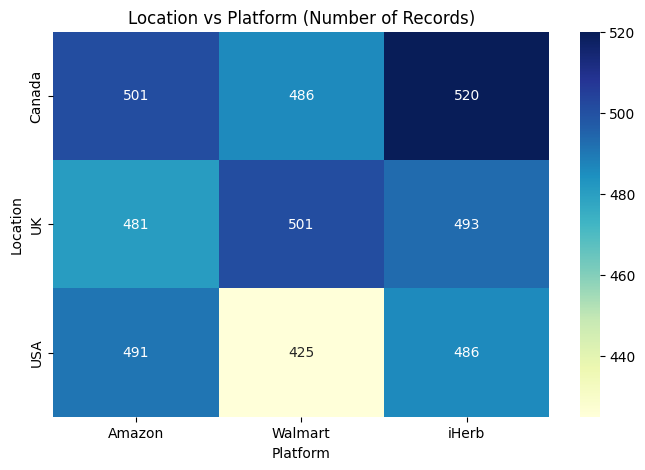

In [ ]:
# Create pivot table
pivot_count = pd.pivot_table(df, values='Units Sold', index='Location', columns='Platform', aggfunc='count', fill_value=0)
# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(pivot_count, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Location vs Platform (Number of Records)")
plt.show()


In [ ]:
# Group by Category
category_summary = df.groupby('Category').agg({
    'Units Sold':'sum',
    'Revenue':'sum',
    'Discount(%)':'mean',
    'Units Returned':'sum'
}).reset_index()
print(category_summary)


      Category  Units Sold     Revenue  Discount(%)  Units Returned
0   Amino Acid       41027  1464819.63    12.164234             428
1   Fat Burner       40743  1440900.05    12.565693             417
2       Herbal       41408  1405700.79    12.624088             392
3    Hydration       41065  1411951.38    11.908759             441
4      Mineral      123668  4276107.99    12.655718            1251
5        Omega       41325  1451065.87    12.890511             407
6  Performance       82523  2909702.18    12.273723             841
7      Protein       82120  2855492.09    12.151460             836
8    Sleep Aid       41165  1397315.79    12.448905             408
9      Vitamin      123434  4300224.68    12.538929            1293


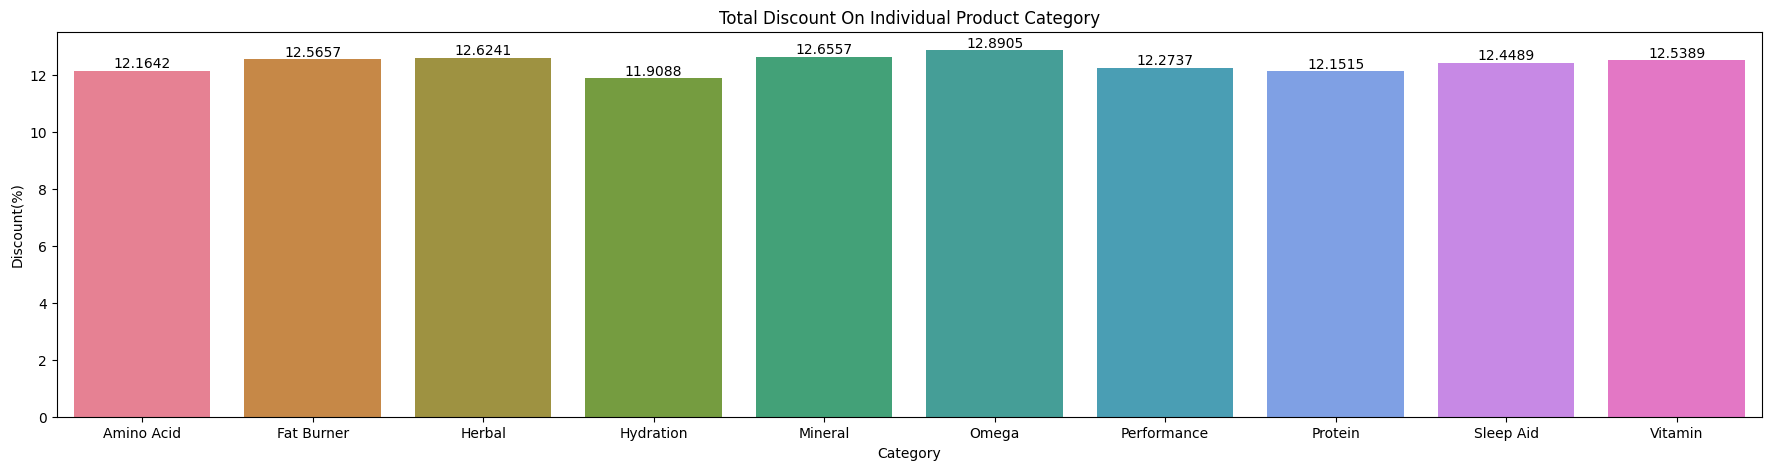

In [ ]:
plt.figure(figsize=(22,5))
plt.title("Total Discount On Individual Product Category")
ax=sns.barplot(x='Category', y='Discount(%)', hue='Category',data=category_summary)
for bars in ax.containers:
    ax.bar_label(bars)

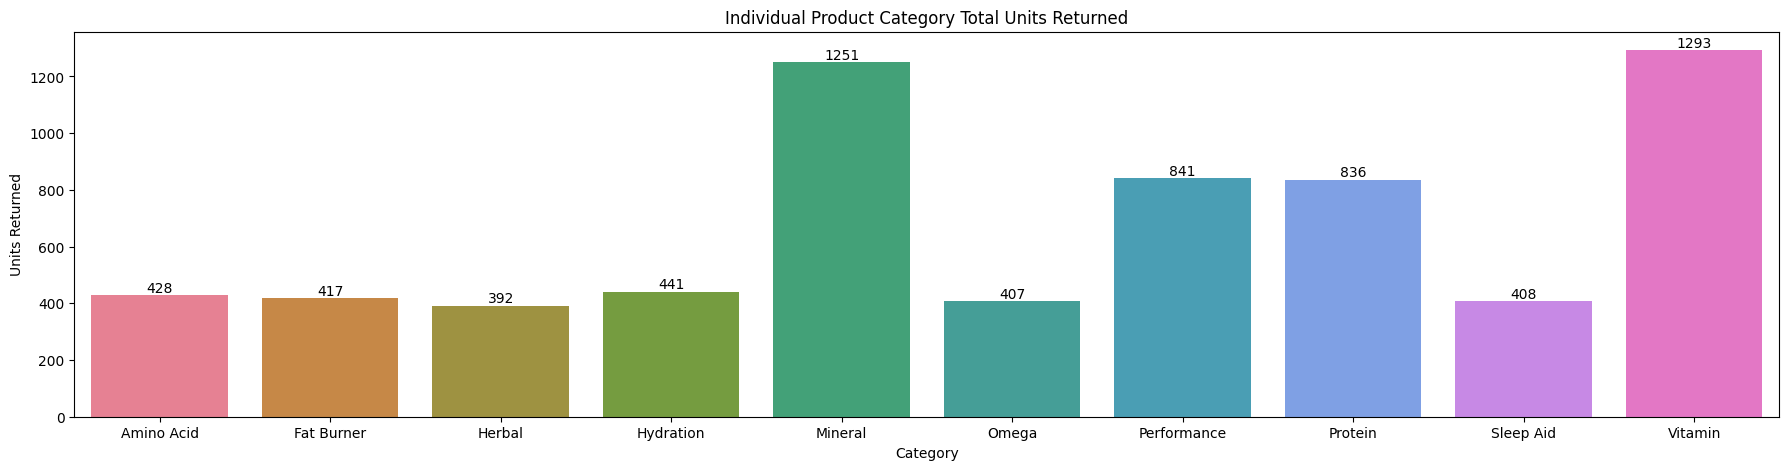

In [ ]:
plt.figure(figsize=(22,5))
plt.title("Individual Product Category Total Units Returned")
ax=sns.barplot(x='Category', y='Units Returned',hue='Category', data=category_summary)
for bars in ax.containers:
    ax.bar_label(bars)

  Location  Units Sold     Revenue  Discount(%)  Units Returned
0   Canada      226053  7848579.73    12.453218            2259
1       UK      221237  7703960.34    12.355254            2327
2      USA      211188  7360740.38    12.514265            2128


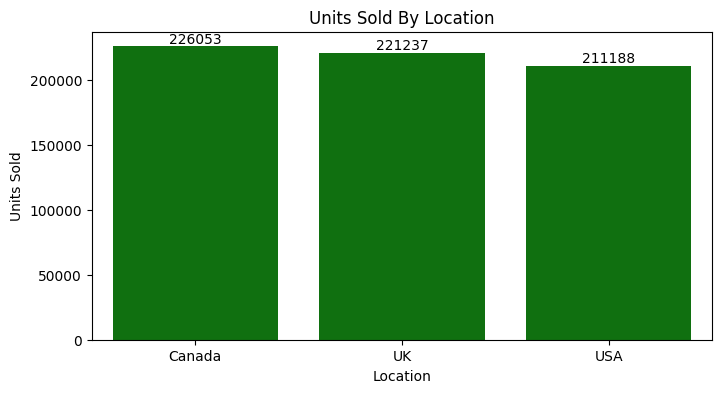

In [ ]:
# Group by Location
location_group = df.groupby('Location').agg({
    'Units Sold':'sum',
    'Revenue':'sum',
    'Discount(%)':'mean',
    'Units Returned':'sum'
}).reset_index()
print(location_group)

plt.figure(figsize=(8,4))
plt.title("Units Sold By Location")
ax2=sns.barplot(x='Location', y='Units Sold',data=location_group)
for bars in ax2.containers:
    ax2.bar_label(bars)




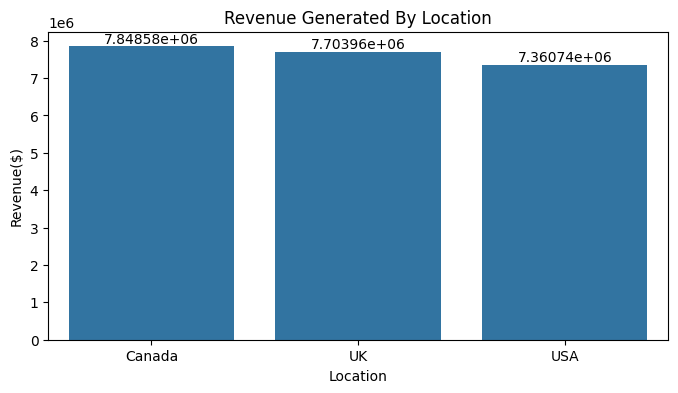

In [ ]:
plt.figure(figsize=(8,4))
plt.title("Revenue Generated By Location")
plt.ylabel("Revenue($)")
ax2=sns.barplot(x='Location', y='Revenue', data=location_group)
for bars in ax2.containers:
    ax2.bar_label(bars)

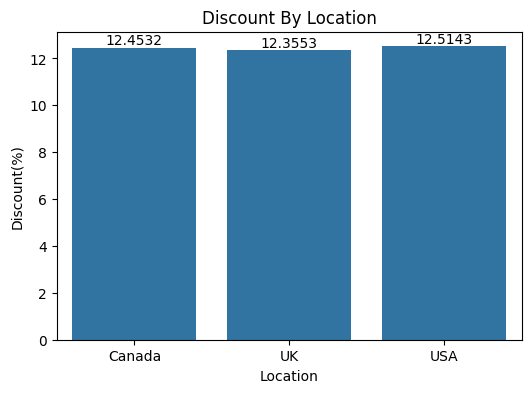

In [ ]:
plt.figure(figsize=(6,4))
plt.title("Discount By Location")
ax2=sns.barplot(x='Location', y='Discount(%)', data=location_group)
for bars in ax2.containers:
    ax2.bar_label(bars)

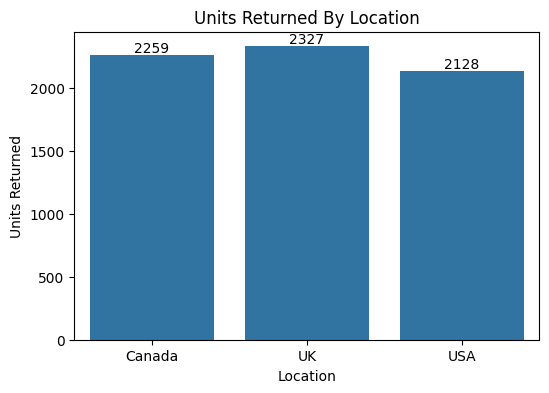

In [ ]:
plt.figure(figsize=(6,4))
plt.title("Units Returned By Location")
ax2=sns.barplot(x='Location', y='Units Returned', data=location_group)
for bars in ax2.containers:
    ax2.bar_label(bars)

  Platform  Units Sold     Revenue  Discount(%)  Units Returned
0   Amazon      220623  7669451.78    12.333333            2295
1  Walmart      212428  7388567.62    12.519122            2128
2    iHerb      225427  7855261.05    12.469646            2291


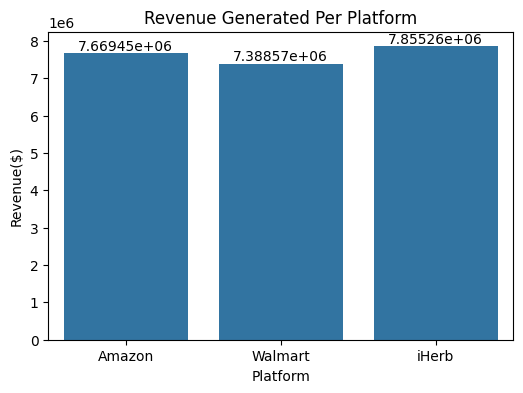

In [ ]:
platform_summary = df.groupby('Platform').agg({
    'Units Sold':'sum',
    'Revenue':'sum',
    'Discount(%)':'mean',
    'Units Returned':'sum'
}).reset_index()
print(platform_summary)

plt.figure(figsize=(6,4))
plt.title("Revenue Generated Per Platform")
plt.ylabel("Revenue($)")
ax3=sns.barplot(x='Platform', y='Revenue', data=platform_summary)

for bars in ax3.containers:
    ax3.bar_label(bars)



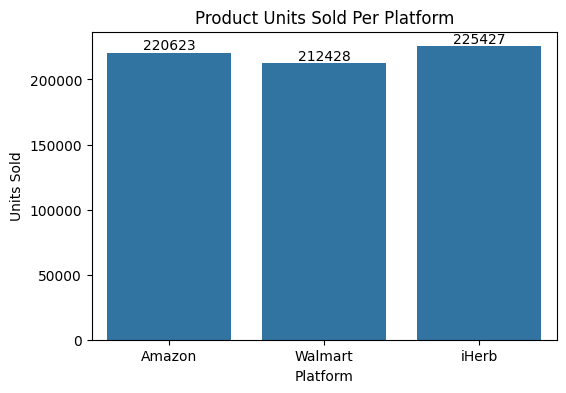

In [ ]:
plt.figure(figsize=(6,4))
plt.title("Product Units Sold Per Platform")
ax3=sns.barplot(x='Platform', y='Units Sold', data=platform_summary)

for bars in ax3.containers:
    ax3.bar_label(bars)


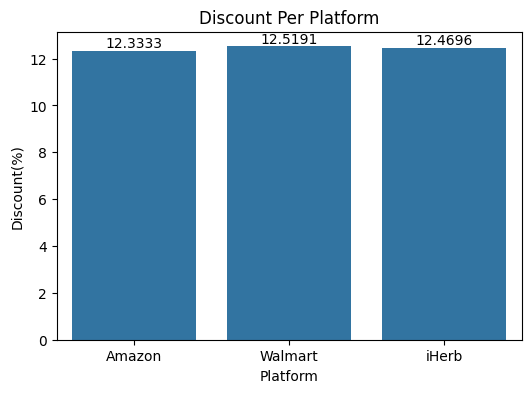

In [ ]:
plt.figure(figsize=(6,4))
plt.title("Discount Per Platform")
ax3=sns.barplot(x='Platform', y='Discount(%)', data=platform_summary)

for bars in ax3.containers:
    ax3.bar_label(bars)


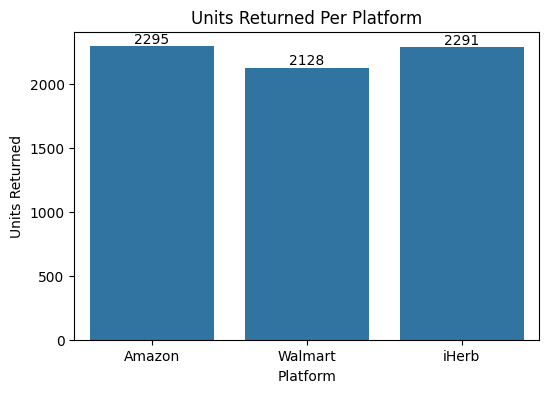

In [ ]:
plt.figure(figsize=(6,4))
plt.title("Units Returned Per Platform")
ax3=sns.barplot(x='Platform', y='Units Returned', data=platform_summary)

for bars in ax3.containers:
    ax3.bar_label(bars)


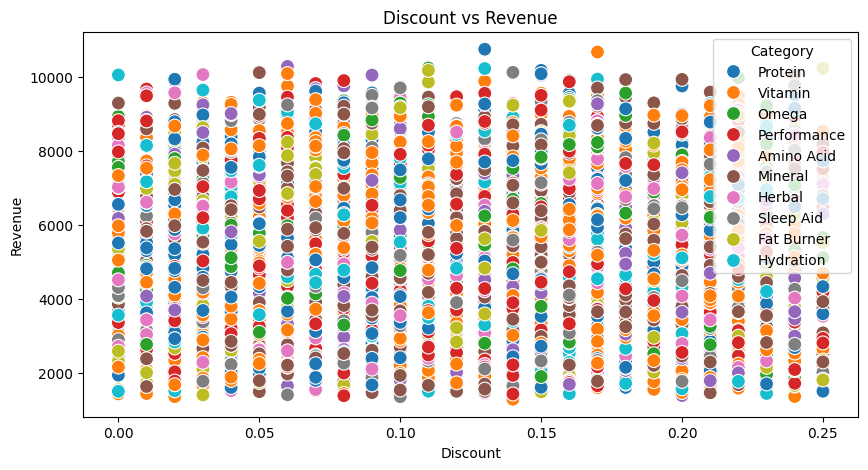

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Discount', y='Revenue', hue='Category', data=df, s=100)
plt.title("Discount vs Revenue")
plt.show()


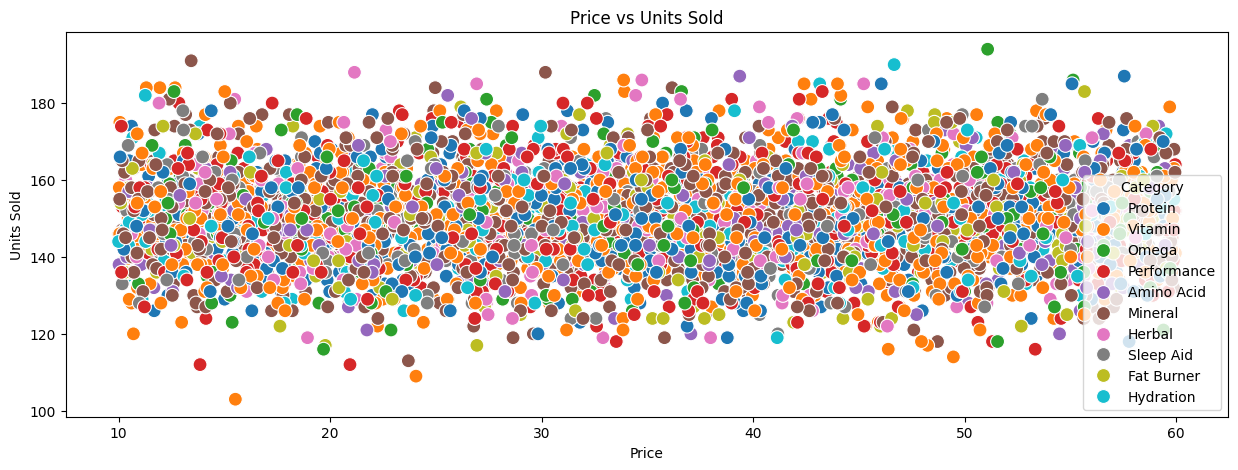

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Price', y='Units Sold', hue='Category', data=df, s=100)
plt.title("Price vs Units Sold")
plt.show()
